# Transformada de Fourier
#### nome: Carlos Keleanderson Pereira da Silva 
#### Universidade federal do Rio de Janeiro

##### Neste notebook vamos ver alguns exemplos introdutórios sobre transformada de fourier 

In [1]:
# vamos importar as bibliotecas importantes
# numpy para o calculos e matplotlib.pyplot para os gráficos
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Agora vamos criar um exemplo simples: 
Vamos supor que existem dois sinais distintos. 
O primeiro será um $y_1(t) = \sin(2\pi 5 t)$. Já o segundo sinal será pareciso $y_2(t) = \sin(2\pi 7 t)$. O primeiro e o segundo sinal diferem, somente, pois em um vemos o número 5 multiplicando o argumento $2\pi t$ e no outro vemos o número 7.
Podemos dizer, numa linguagem mais rebuscada que, se o argumento $(2 \pi 1 t)$, é o nossa fundamental então $y_1(t)$ e $y_2(t)$ serão, respectivamente, as quinta e sétima harmônicas.
Mas por hora nos interessa somente que existem dois sinais e vamos somar esses dois sinais para formar um novo que a princípio não há nenhuma relação visual com os anteriores, plotar e ver como ficará o nosso sinal

Text(0.5, 0, 'time')

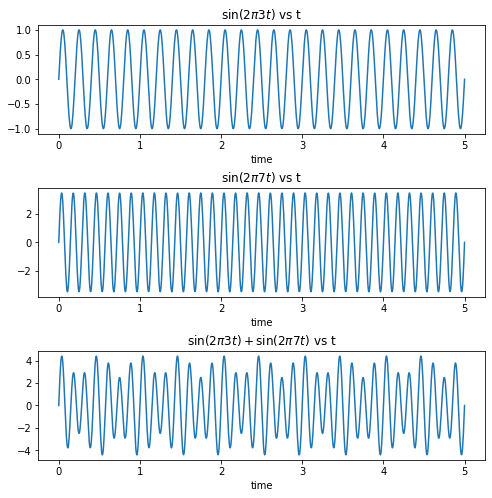

In [2]:
# numero de pontos no gráfico
amostra = 1024

# tempo final, inicial e vetor de tempo
t_i = 0
t_f = 5
t = np.linspace(t_i,t_f,amostra)

# as amostras
amostra_1 = 1.*np.sin(2*np.pi*5*t) # quinta harmônica
amostra_2 = 3.5*np.sin(2*np.pi*7*t) # sétima harmônica

# montando os gráficos
figure, axis = plt.subplots(nrows=3,ncols=1,figsize=(8,8)) # cria os diferentes subplots
plt.subplots_adjust(wspace=.2,hspace=.5) # ajusta o espaço entre eles
axis[0].set_xlabel('time') # define o nome do eixo x
axis[0].set_title('$\sin(2\pi 3t)$ vs t') # define o título do gráfico
axis[0].plot(t,amostra_1) # plota o gráfico

# faz a mesma coisa pros outros gráficos
axis[1].plot(t,amostra_2)
axis[1].set_title('$\sin(2\pi 7t)$ vs t')
axis[1].set_xlabel('time')

axis[2].plot(t,amostra_1+amostra_2)
axis[2].set_title('$\sin(2\pi 3t)+\sin(2\pi 7t)$ vs t')
axis[2].set_xlabel('time')

Se recebermos o ultimo gráfico, a soma das duas funções de seno, seria possível remontar as funções originais ( que compuseram o ultimo gráfico)?
Bem, vamos utilizar uma ferramenta matemática para chamada:
###### Transformada de Fourier

Nela vamos poder decomport a nossa função em espectro. De maneira mais simples vamos poder analisar as a amplitude e as frequências que compõe o nosso sinal.
E enfim vamos plotar no gráfico e ver se podemos realmente extrair essas informações

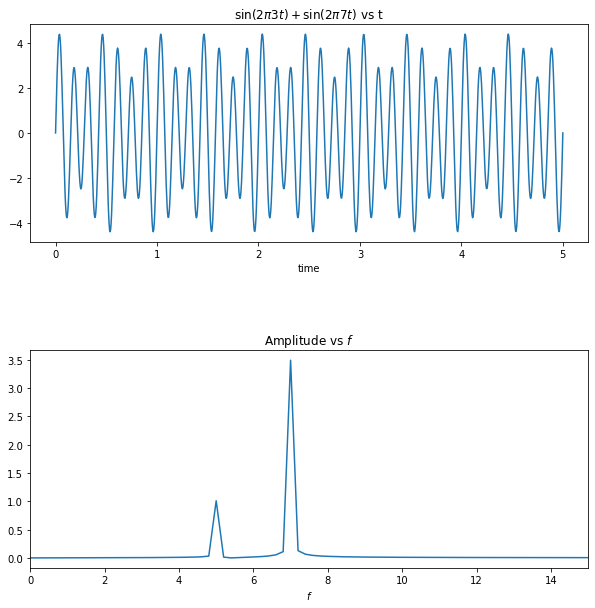

In [3]:
# aplicamos a transformdada de fourier, np.fft.fft, e algumas roubadas matematicas para normalizar a amostra
ft = 2.*np.abs(np.fft.fft(amostra_1+amostra_2))/amostra
freq = np.fft.fftfreq(amostra,(t_f-t_i)/amostra) # definimos o vetor de frequencia
marcador = freq>=0 # vamos pegar somente as freqeuncia positivas, para isso utilizamos um marcador


n_ft = ft[marcador] # pegamos somente valores em que a ft ( a transformada da função) é positiva
n_freq = freq[marcador] # faz-se a mesma coisa para o vetor de frequência

# basicamente o mesmo procedimento de plotar
figure2,axis2 = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
plt.subplots_adjust(wspace=.2,hspace=.5)

axis2[0].set_title('$\sin(2\pi 3t)+\sin(2\pi 7t)$ vs t')
axis2[0].plot(t,amostra_1+amostra_2)
axis2[0].set_xlabel('time')


axis2[1].set_title('Amplitude vs $f$')
axis2[1].set_xlabel('$f$')
axis2[1].set_xlim(0,15)
axis2[1].plot(n_freq,n_ft)

Vemos que o gráfico acima tem dois 'picos'. O pico mais a esqueda está localizado na frequenia de 5Hz e que tem amplitude de 1.0. Vemos que nesse caso temos uma componente de quinta harmonica que tem amplitude 1.
se analisarmos o outro pico com 3.5 de amplitude veremos que este se encontra na frequência f=7 ( nossa componente de sétima hamônica). portanto a partir desta característica podemos remontar o nosso sinal pois temos a amplitude e a frequencia da componente harmonica.

##### Vamos agora definir a função degrau e então ver o espectro da mesma ( somente valores positivos)

In [4]:
#definindo um pulso
def pulse(time):
    f = np.zeros(len(time)) # criasse uma matrix de zero do tamanho do vetor tempo
    for i,t in zip(range(len(time)),time): 
        if t>-1 and t<1: # se estiver entre esses valores então a função ganha 1 naquele ponto 
            f[i]=1
    return f

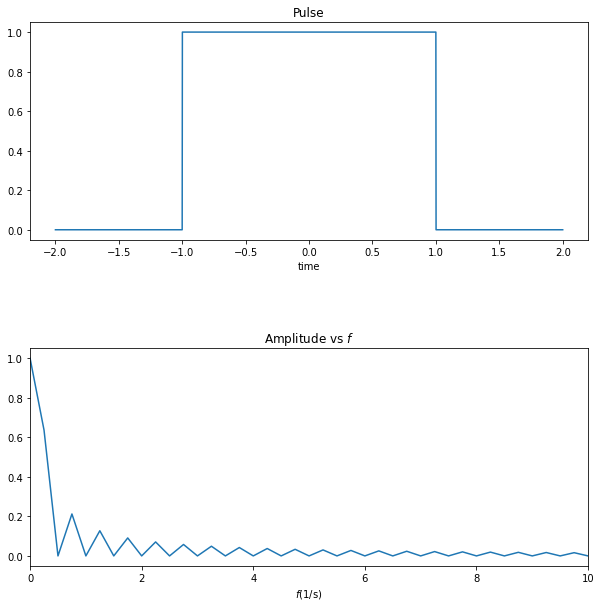

In [19]:
#%matplotlib

sample = 5000
ti = -2
tf = 2
t1 = np.linspace(ti,tf,sample)

ft0 = 2.*np.fft.fft(pulse(t1))/sample
ft1 = 2.*np.abs(np.fft.fft(pulse(t1)))/sample
freq1 = np.fft.fftfreq(sample,(tf-ti)/sample)

n_ft0 = ft0[freq1>=0]
n_ft1 = ft1[freq1>=0]
n_freq1 = freq1[freq1>=0]

figure3,axis3 = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
plt.subplots_adjust(wspace=.2,hspace=.5)

axis3[0].set_title('Pulse')
axis3[0].plot(t1,pulse(t1))
axis3[0].set_xlabel('time')


axis3[1].set_title('Amplitude vs $f$')
axis3[1].set_xlabel('$f$(1/s)')
axis3[1].set_xlim(0,10)
axis3[1].plot(n_freq1,n_ft1)